In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [7]:
# Seperate features and targets 
x=df.drop(['math score'],axis=1)
y=df['math score']

In [8]:
# Categorical features
ctg_cols = x.select_dtypes(include='object').columns.tolist()

Convert Text to Numbers

In [11]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), ctg_cols)
], remainder='passthrough')
X_encoded = ct.fit_transform(x)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

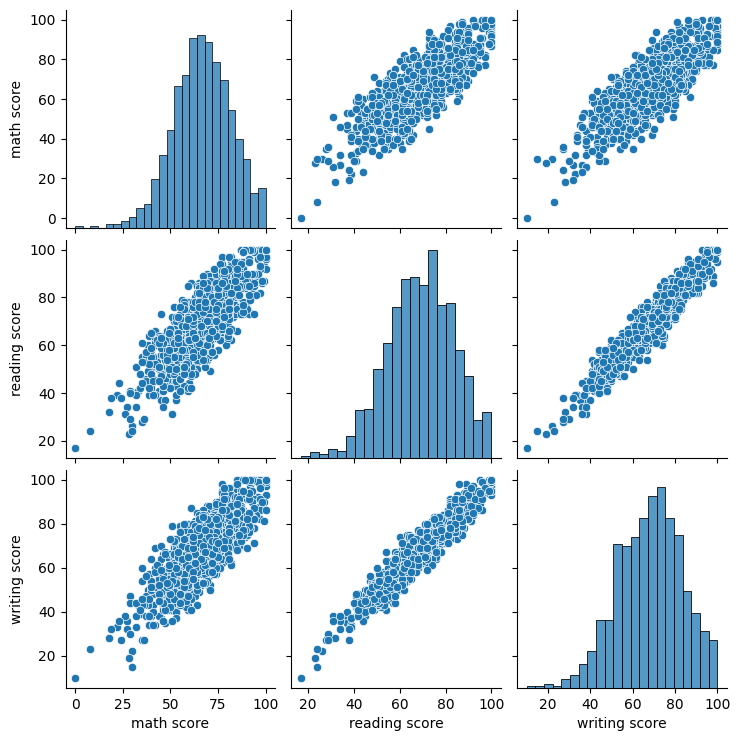

In [14]:
# Pairplot for visual exploration
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()

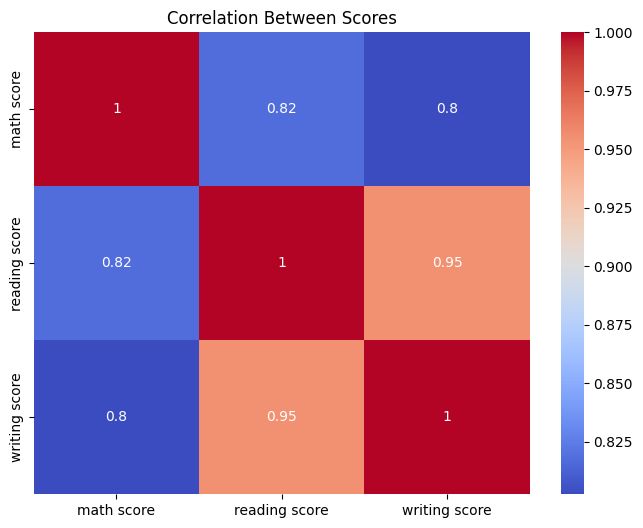

In [15]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()

In [16]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

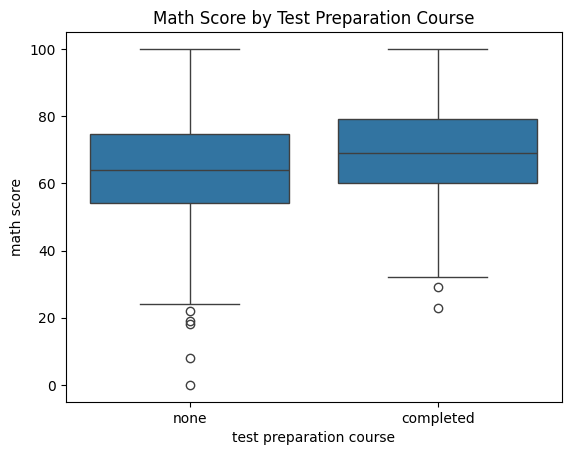

In [17]:
# Boxplot for test preparation course
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score by Test Preparation Course')
plt.show()

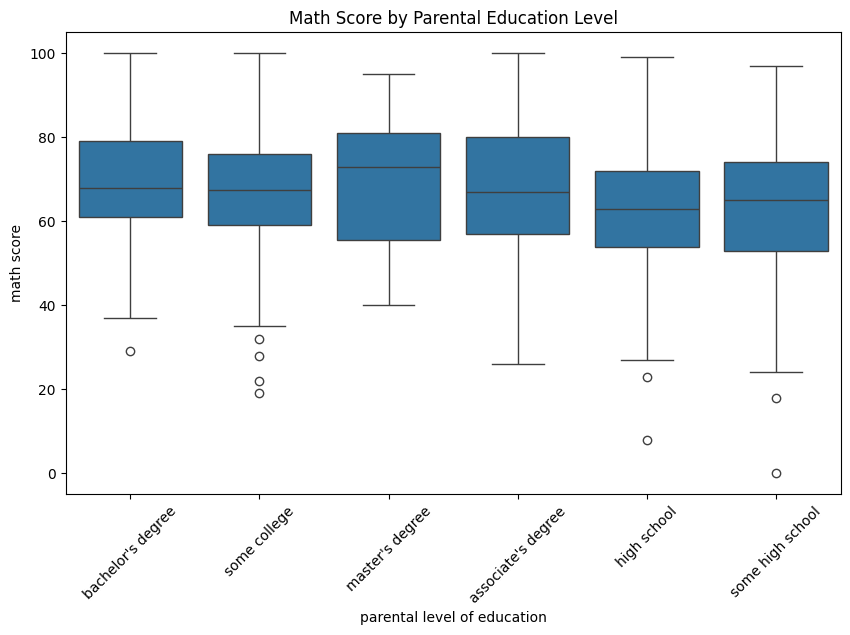

In [18]:
# Boxplot for parental level of education
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Math Score by Parental Education Level')
plt.show()

In [19]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.88
MAE: 4.21
RMSE: 5.39


Separate Models by Gender

In [23]:
for gender in df['gender'].unique():
    print(f"\n Gender: {gender}")
    df_gender = df[df['gender'] == gender]
    X = df_gender.drop(['math score'], axis=1)
    y = df_gender['math score']
    
    categorical_cols = X.select_dtypes(include='object').columns.tolist()
    ct = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), categorical_cols)], remainder='passthrough')
    X_encoded = ct.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'R²: {r2_score(y_test, y_pred):.2f}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')



 Gender: female
R²: 0.90
MAE: 4.42
RMSE: 5.48

 Gender: male
R²: 0.85
MAE: 4.54
RMSE: 5.42
